<div style='background-color: cyan'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#model'>Modeling</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<div style='background-color: cyan'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Import 'final.py' to expedite and maintain cleanliness
import final as f
import warnings
warnings.filterwarnings("ignore")

<div style='background-color: cyan'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

---

<h3><b>Acquire and Prepare</b></h3>

- Acquisition
    - Web Scraping
        - Data was aquired by webscraping the PGA tour website. We looped through every year available, 1987 to 2023,  scraping data from three different statistic sources on this website; driving distance, average par 4 score, and average par 5 score.
        
            - link: https://www.pgatour.com/stats
        
        - To obtain DOB, weight, and height for additional exploration, we scraped data from the Detroit Free Press website. 
        
            - link: http://freep.sportsdirectinc.com/golf/pga-players.aspx?page=/data/pga/players/A_players.html
        
        
- Merging
    - Making something usefull
        - After scraping the pga tour webpages, we extracted the desired data into thier 3 respective dataframes for each stat. We then merged them together into one, stratifying on the year and player feature to promote data integrity.
        
        - The biometric data was merged in later for the additional exploration phase.
- Prepare
    - Clean and Audit
        - We pulled random samples and audited the data to ensure it merged correctly without errors. We then renamed columns to promote readability. 

In [2]:
# From the 'final.py' file...
# Get the main stat prepared dataframe
df = f.acquire_data()
df.shape

(7048, 5)

- Prepared 'prep_data' shape:
    - Rows: 7048
    - Columns: 5

---

<h3><b>Group by year</b></h3>

In [3]:
# From the 'final.py' file...
# Call function to group the df by year using mean
df_by_yr = f.get_df_by_year(df)

<h3><b>Split</b></h3>

In [4]:
# From the 'final.py' file...
# Call function to split the df
train, validate, test = f.tts(df_by_yr)

- Train
    - 70%
- Validate
    - 20%
- Test
    - 10%

#### Data will be split post exploration for modeling.

<div style='background-color: cyan'>
<a id='explore'></a>
    <b><u><i><h1 style='text-align: center'>
        Exploration
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#visuals'>Key Visuals</a></li>
<li><a href='#exploresummary'>Summary</a></li>

<a id='visuals'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

### How has the average driving distance increased over time?

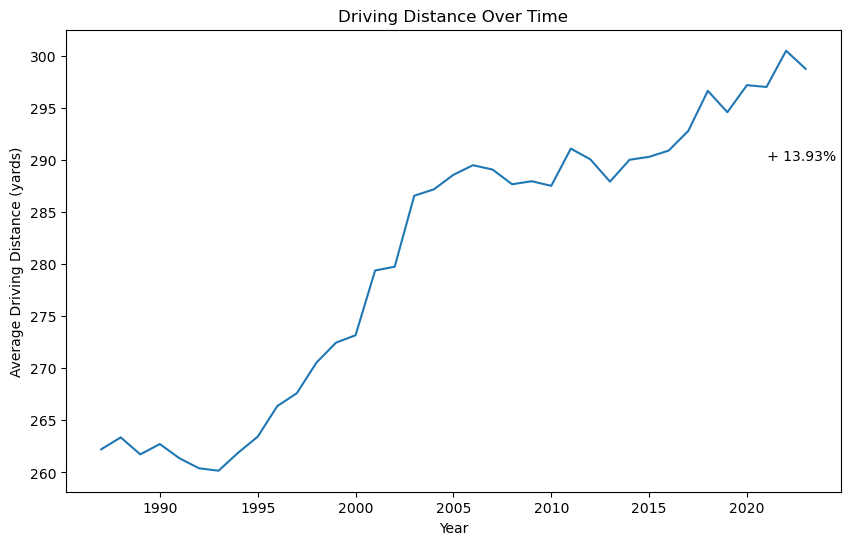

In [5]:
# From the 'final.py' file...
# Get the plot visualizing driving dist over time
f.dist_over_time(df_by_yr)

#### We can see here that average driving distance has increased significantly since the late 80's, with a dramatic increase from the early 90's to mid 00's.

### How has par 4 and par 5 scoring changed over time?

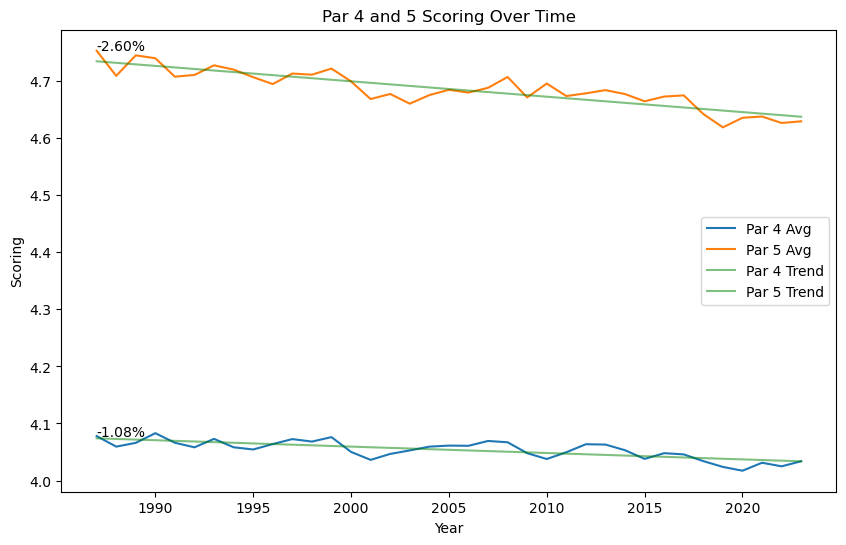

In [6]:
# From the 'final.py' file...
# Call function to display par 4&5 scoring vis
f.scoring_over_time(df_by_yr)

#### We can see here that while average drive distance has increased nearly 14% since the late 80's, average par 5 scores have improved 2.6% while average par 4 scores have improved 1.08%. 

---

### Have changes to golf clubs influenced driving distance?

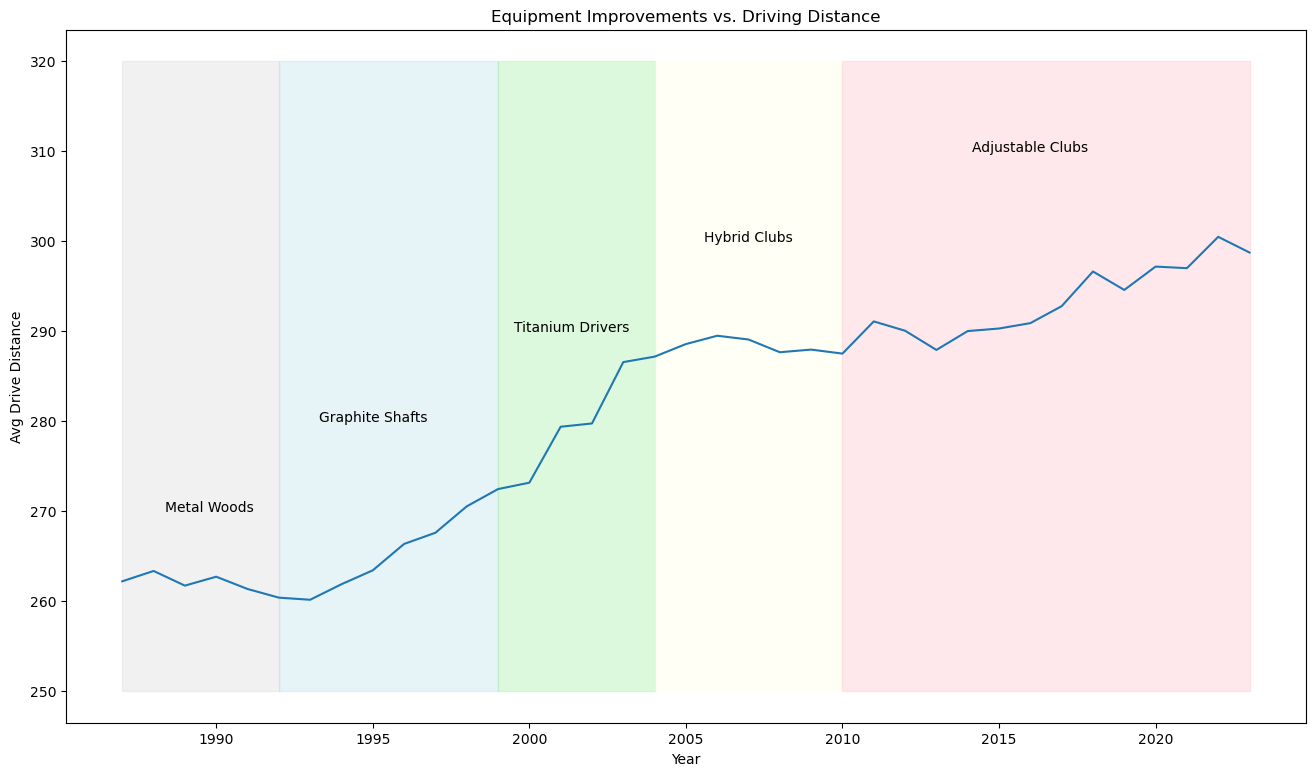

In [7]:
# From the 'final.py' file...
# Get the vis displaying avg drive distance with club changes
f.get_club_changes(df_by_yr)

#### Here we see significant changes to golf clubs compared to average tour player driver distance.

### Have changes to golf balls influenced driving distance?

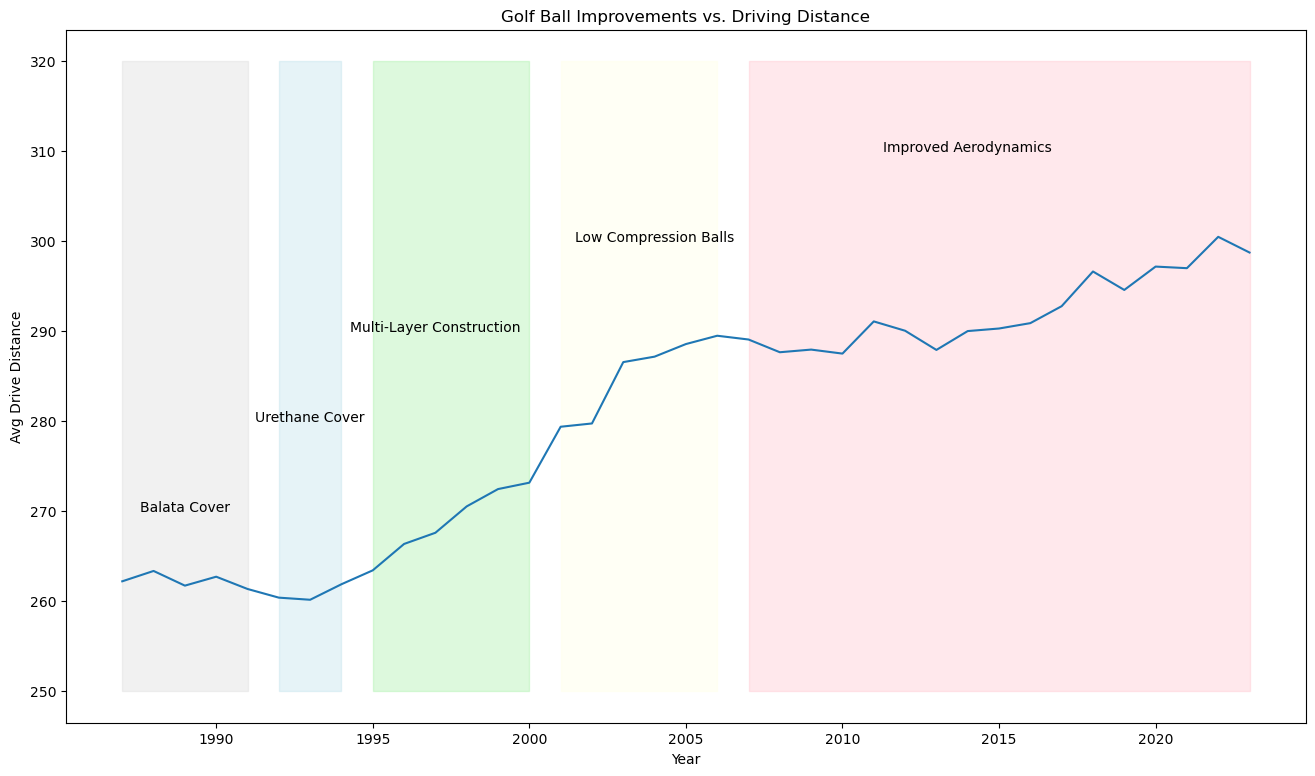

In [8]:
# From the 'final.py' file...
# Get the vis displaying avg drive distance with ball changes
f.get_ball_changes(df_by_yr)

#### Here we see significant changes to golf balls compared to average tour player driver distance.

<h3><b>Visualization Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

- We can see that driving distances have significantly increased since the late 70's, by nearly 14%, while par 4 scores have improved only about 1%. Par 5 scores however, appear to be the most significantlly impacted by the driving distance increase as scores have improved 2.6%


- By observing the previous 2 visualizations, we can feel confident that the combonation of titanium drivers and low compression golf balls significantly impacted average driver distance. Roughly a 20 yard increase was observed in this period.  

---

## Regression Analysis

**Regression analysis is a way of understanding how one variable (the "dependent" variable) changes when other variables (the "independent" variables) change. In this case, we're looking at how the average score on par 4 and par 5 holes (the dependent variables) change when the average driving distance (the independent variable) changes.**

**The coefficient of the independent variable (in this case, the driving distance) tells us how much the dependent variable (the scoring average) is expected to change when the independent variable increases by one unit.** 

**The mean squared error is a measure of how well the model fits the data. It's the average of the squared differences between the predicted and actual values. A lower value means the model fits the data better.**

**The coefficient of determination, also known as R-squared, tells us what proportion of the variation in the dependent variable can be explained by the independent variable(s). For example, an R-squared of 0.50 means that 50% of the variation in par 5 scoring average can be explained by the driving distance.**

In [9]:
# From the 'final.py' file...
# Call function to produce regression analysis results for par 4 data
f.get_par4_reg_analysis(df)

Coefficients: 
 [-0.00079054]
Mean squared error: 0.00
Coefficient of determination: 0.06


- The coefficient of 'drive_avg' is approximately -0.00079. This means that for each additional yard in the average driving distance, the par 4 scoring average improves by about 0.00079. This is a very small change, suggesting that while there is a negative relationship between driving distance and par 4 scoring average, the effect is quite small.


- The mean squared error of the model on the test set is approximately 0.00. This is a measure of the average squared difference between the predicted and actual values, with lower values indicating a better fit.


- The coefficient of determination (R-squared) is approximately 0.06. This value ranges from 0 to 1 and represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value of 0.06 suggests that about 6% of the variation in par 4 scoring average can be explained by the driving distance.

---

In [10]:
# From the 'final.py' file...
# Call function to produce regression analysis results for par 5 data
f.get_par5_reg_analysis(df)

Coefficients: 
 [-0.00259515]
Mean squared error: 0.00
Coefficient of determination: 0.28


- The coefficient of 'drive_avg' is approximately -0.0026. This means that for each additional yard in the average driving distance, the par 5 scoring average improves by about 0.0026. This is a very small change, suggesting that while there is a negative relationship between driving distance and par 5 scoring average, the effect is quite small.


- The mean squared error of the model on the test set is approximately 0.00. This is a measure of the average squared difference between the predicted and actual values, with lower values indicating a better fit.


- The coefficient of determination (R-squared) is approximately 0.28. This value ranges from 0 to 1 and represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value of 0.28 suggests that about 28% of the variation in par 5 scoring average can be explained by the driving distance.

---

<a id='exploresummary'></a>
<h3><b>Analysis Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<b>Simply put, the regression analysis is telling us that there is a relationship between driving distance and scoring average: as driving distance increases, scoring average tends to decrease. However, the relationship is not very strong, and driving distance only explains a small portion of the variation in scoring average. It's important to keep in mind we are looking at the complete tour average. It is possible that analyzing the top percentage of players could yeild much different results compared to the entirety of the tour.</b> 

---

## Additional Exploration

#### For some additional exploration, we wanted to take a look at player age. We used the DOB to calculate the player age at each instance of record. We used a regression model to make predictions on how many years a player would take to reach the 317 driving distance regulation, then engineered additional features to see the age the player is predicted to reach it.

In [11]:
# From the 'final.py' file...
# Call function import additional dataset 
merged_data = f.load_pmvp('https://drive.google.com/uc?export=download&id=118ULHKdAmNeuvc_1EKPP24D9DW3W-5bg')
merged_data.head()

,player,year,par_4_avg,par_5_avg,drive_avg,Height,Weight,DOB,Birthplace,age
0,Bernhard Langer,1987,3.98,4.69,260.3,"5'9""",160 lbs,1957-08-27,"Anhausen , DEU",30
1,Bernhard Langer,1989,4.07,4.82,255.9,"5'9""",160 lbs,1957-08-27,"Anhausen , DEU",32
2,Bernhard Langer,2001,3.94,4.72,269.5,"5'9""",160 lbs,1957-08-27,"Anhausen , DEU",44
3,Bernhard Langer,2002,4.08,4.66,271.3,"5'9""",160 lbs,1957-08-27,"Anhausen , DEU",45
4,Bernhard Langer,2003,4.08,4.77,272.3,"5'9""",160 lbs,1957-08-27,"Anhausen , DEU",46


In [12]:
# From the 'final.py' file...
# Call function to run Linear regression model to predict age players are expected to reach drive_avg 317
results = f.predict_age_to_reach_drive_avg_positive_coef(merged_data)

In [13]:
# Convert results to dataframe, add and rename columns, save dataframe to csv
df_results = f.results_to_csv(results, 'age_predictions.csv')
df_results.head()

,player,age
0,John Daly,46.992199
1,Jonathan Kaye,44.305162
2,Gabriel Hjertstedt,43.115789
3,Spike McRoy,46.963128
4,Matt Gogel,48.940248


In [14]:
df_results.age.mean()

39.549587559208845

#### The above shows the prediction that the average pga tour player is expected to reach 317 yards at age 39.

In [15]:
# From the 'final.py' file...
# Call function import additional datasets 
merged_df = f.load_pmvp('https://drive.google.com/uc?export=download&id=1u5AxqlhZxuCIgq7x8GSJt0S5eKQZzLi_')
merged_df.head()

,Unnamed: 0,player,year,par_4_avg,par_5_avg,drive_avg,Height,Weight,DOB,Birthplace,age_x,age_y,predicted_years
0,0,John Daly,1991,4.09,4.61,288.9,"5'11""",250 lbs,1966-04-28,"Carmichael , USA",25,46.992199,21.992199
1,1,John Daly,1992,4.11,4.63,283.4,"5'11""",250 lbs,1966-04-28,"Carmichael , USA",26,46.992199,20.992199
2,2,John Daly,1993,4.10,4.62,288.9,"5'11""",250 lbs,1966-04-28,"Carmichael , USA",27,46.992199,19.992199
3,3,John Daly,1995,4.11,4.72,289.0,"5'11""",250 lbs,1966-04-28,"Carmichael , USA",29,46.992199,17.992199
4,4,John Daly,1996,4.07,4.77,288.8,"5'11""",250 lbs,1966-04-28,"Carmichael , USA",30,46.992199,16.992199


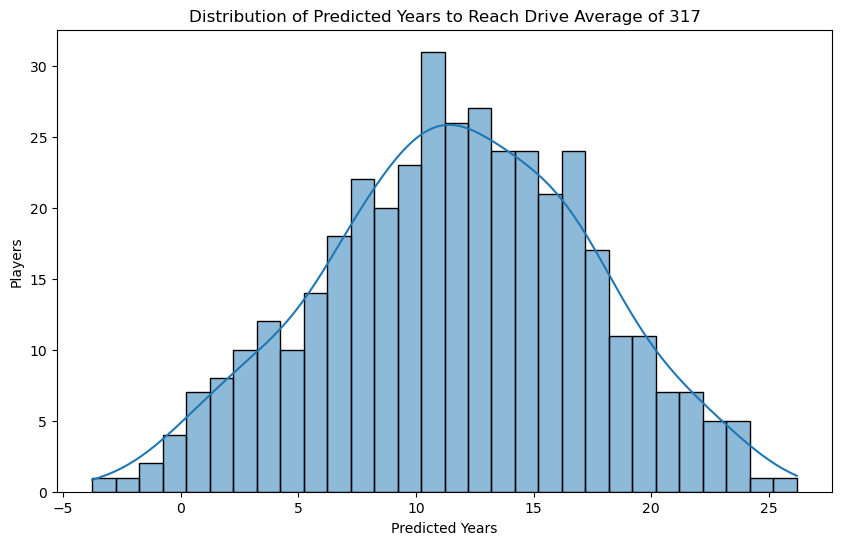

In [16]:
# From the 'final.py' file...
# Call function to produce histogram of predicted_years to reach drive_avg 317
f.plot_predicted_years(merged_df)

#### Here is the distribution of the predicted years it will take PGA players to average 317 driving yards.

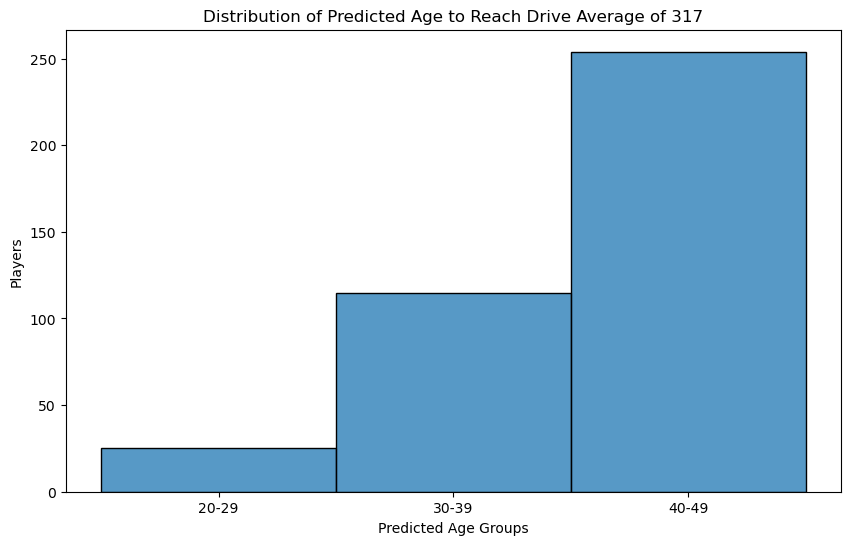

In [17]:
# From the 'final.py' file...
# Call function that creates bins for predicted age groups to reach 317 and plots a histogram
f.plot_predicted_age_groups(merged_df)

#### Here is the distribution of the predicted age groups of PGA players averaging 317 driving yards. Note our model did predict some players are not capable of reaching this metric by age 50, a reasonable cutoff based on historical data and the entry age for the PGA senior tour. 

## Segmented Data:
#### To understand if the USGA is basing their decisions off of a specific segment of players, we separated our data by using the driving average for top 10%, middle 80%, bottom 10% by distance.

---

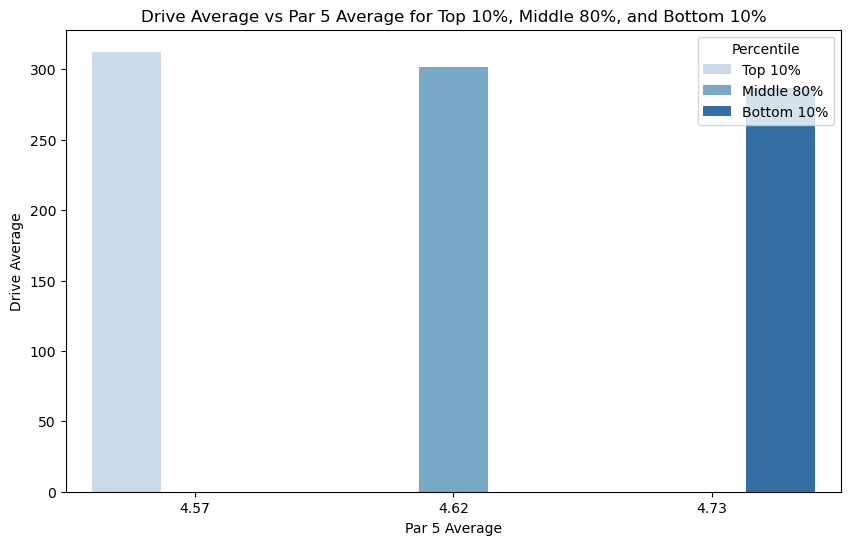

In [18]:
# From the 'final.py' file...
# Call function to produce bar chart of percentiles for drive_avg with par 5 averages
f.calculate_and_plot_averages(merged_df)

#### Here we can see the top 10% of players in regard to driving distance, score less than 1% better on par 5 holes compared to the middle 80, and less than 4% better than the bottom 10%.

---

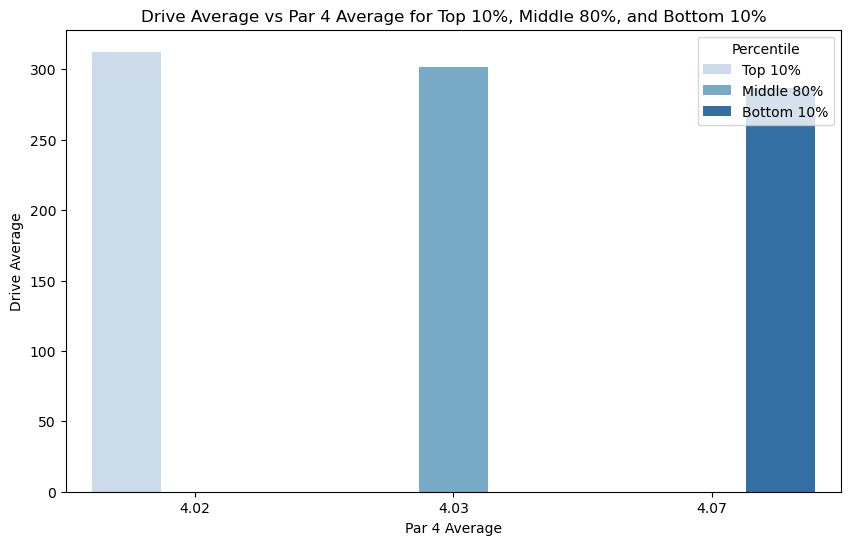

In [19]:
# From the 'final.py' file...
# Call function to produce bar chart of percentiles for drive_avg with par 4 averages
f.calculate_and_plot_averages_par_4(merged_df)

#### Here we can see the top 10% of players in regard to driving distance, show a negligible scoreing improvement over the middle 80% and bottom 10%.

---

<div style='background-color: cyan'>
<a id='model'></a>
    <b><u><i><h1 style='text-align: center'>
        Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#baseline'>Baseline</a></li>
<li><a href='#modeltable'>Models Table</a></li>
<li><a href='#bestmodel'>Best Model</a></li>

In [20]:
# From the 'final.py' file...
# Call function to prepare our subsets for modeling.
train, validate, test = f.model_prep()

#### This function re-acquires data,  groups the data by year using mean, converts to datetime format, drops unnecessary columns, and splits data

<a id='baseline'></a>
<h3><b>Baseline</b></h3>
<li><a href='#model'>Modeling Top</a></li>

#### Serveral baseline models were ran to have the strongest comparison against which our trained models can be compared. The strongest baseline is a 3 year moving average model.

In [21]:
# From the 'final.py' file...
# Call function to perform all baseline testing and return top results
f.compute_moving_avg(train, validate)[0:1]

,model_type,target_var,rmse
0,3_year_moving_avg,drive_avg,3.51


### Baseline RMSE:  3.51

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

#### Several models/hyperparameters were trained. The model with the best performance on train and validate sets will be tested against our unseen test dataset. Our best model is a Holts linear trend model. The RMSE and visualization of this model is shown below.

### Validate

drive_avg -- RMSE: 2.87


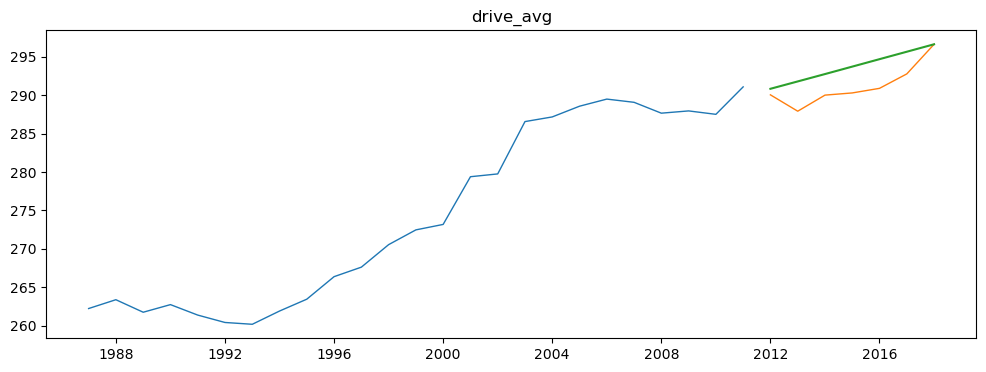

In [22]:
# From the 'final.py' file...
# Return RMSE and visualization of predictions on validate set
f.train_val_best_model(train, validate)

### Test

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse- drive_avg:  2.2733799923091227
rmse- par_4_avg:  0.019431165457442383
rmse- par_5_avg:  0.011596302517951828


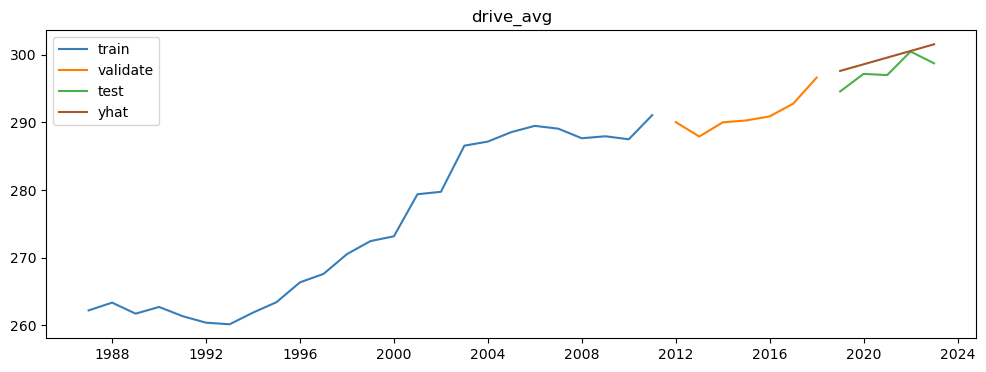

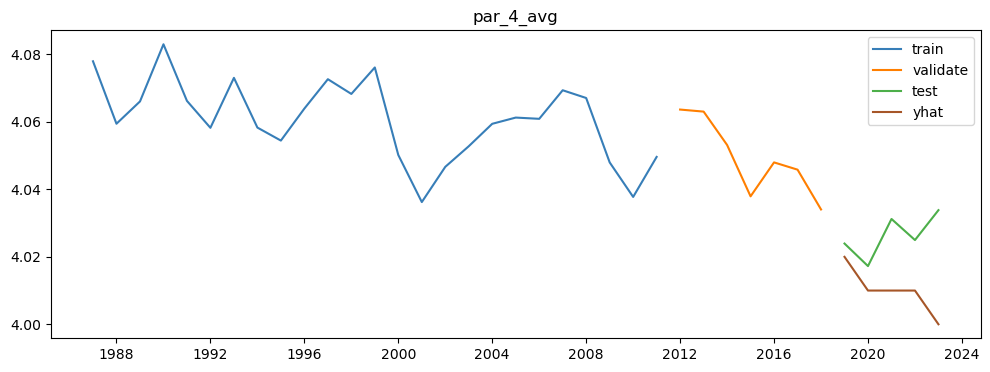

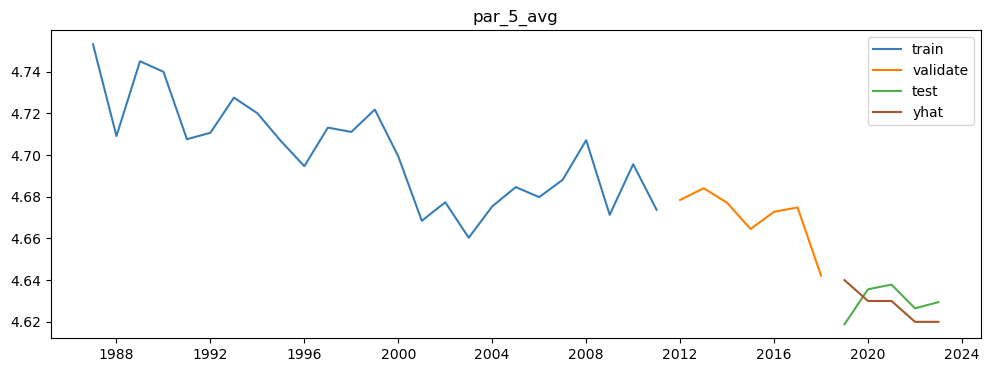

In [23]:
# From the 'final.py' file...
# Return RMSE and visualization of predictions on test set
f.test_best_model(train, validate, test)

---

<div style='background-color: cyan'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align: center'>
        Conclusion
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#conclusionsummary'>Summary</a></li>
<li><a href='#rec'>Recommendations</a></li>
<li><a href='#nextsteps'>Next-Steps</a></li>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

Our model's performance was significantly enhanced, as evidenced by the reduction in RMSE from the baseline of 3.51 to 2.27 on the test data. This improvement of approximately **35.33%** demonstrates a substantial increase in prediction accuracy and suggests that our model is able to capture the underlying patterns and variability within the data with confidence.

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

We understand that decisions to "roll back" the golf ball may be necessary to ensure that the most prestigous and tradition-important courses remain relevant and a test to golfing elites. However, we strongly recommend the USGA consider that our analysis promotes confidence that the average player will not reach thier 317 yard driving limit of the current golf ball until 2038-2039, and they have plenty of time to conitinue monitoring this concern over the coming years. 

Even among the elite, skill gaps can and should be present in our opinion, and we recommend further research to determine if this rule change affects players of all driving distances, not just those driving the farthest. We can see the minimal effects driving distance has on scoring, and with this rule change predicited to only reduce driving distance 14-15 yards, it's our opinion the bifurification of rules for pros and regular players could have greater impacts to the game than the proposed benefits the USGA suggests. 

Quote from Titleist, the worlds leading golfball manufacturer: "The game’s growth and global appeal are linked to unification. Bifurcation of the rules breaks that link."

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

The next steps to further enhance our project would be to explore additional features and metrics of pga tour golfers to understand what else driving distance may be affecting. 

Also, to provide alternatives to nerf the "heavy hitters" without causing bifurification, we would like to explore data course by course to understand if narrowing fairways after a certain yardage, or moving traps where applicable, could provide the enhanced difficulty the USGA is seeking for the top players.